<div class="alert alert-block alert-info">
<center> <h1> BUSINESS CASE 3 - BUSINESS CASES FOR DATA SCIENCE </h1> </center> <br>
<center> MDSAA 2021/2022 </center>

<a class="anchor" id="import">

## 1. Import

</a>

<a class="anchor" id="importlibraries">

__`1.1. Import Libraries`__ 
    
</a>

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras import Input
from keras.layers import Dense, LSTM, Dropout
from keras.layers import Bidirectional, GRU, RepeatVector, Dense, TimeDistributed

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

<a class="anchor" id="importdataset">

__`1.2. Import Datasets`__ 
    
</a>

In [2]:
adj_close = pd.read_csv(r'C:\Users\Administrador\OneDrive - NOVAIMS\Mestrado\Business Cases DS\business-cases-21-22\BC4_crypto_forecasting\data\adj_close.csv')
close = pd.read_csv(r'C:\Users\Administrador\OneDrive - NOVAIMS\Mestrado\Business Cases DS\business-cases-21-22\BC4_crypto_forecasting\data\close.csv')
high = pd.read_csv(r'C:\Users\Administrador\OneDrive - NOVAIMS\Mestrado\Business Cases DS\business-cases-21-22\BC4_crypto_forecasting\data\high.csv')
low = pd.read_csv(r'C:\Users\Administrador\OneDrive - NOVAIMS\Mestrado\Business Cases DS\business-cases-21-22\BC4_crypto_forecasting\data\low.csv')
open_ = pd.read_csv(r'C:\Users\Administrador\OneDrive - NOVAIMS\Mestrado\Business Cases DS\business-cases-21-22\BC4_crypto_forecasting\data\open.csv')
volume = pd.read_csv(r'C:\Users\Administrador\OneDrive - NOVAIMS\Mestrado\Business Cases DS\business-cases-21-22\BC4_crypto_forecasting\data\volume.csv')

In [380]:
open_

,Date,ADA-USD,ATOM-USD,AVAX-USD,AXS-USD,BTC-USD,ETH-USD,LINK-USD,LUNA1-USD,MATIC-USD,SOL-USD
0,2017-04-26,NaN,NaN,NaN,NaN,1265.989990,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,1281.880005,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,1317.739990,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,1317.839966,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,1321.869995,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1821,2022-04-21,0.937272,24.290905,78.268646,46.146866,41371.515625,3077.829346,14.022598,94.938416,1.417712,105.497673
1822,2022-04-22,0.910335,23.305815,75.084648,45.084476,40525.863281,2986.938721,13.587431,90.784470,1.379697,101.757423
1823,2022-04-23,0.907185,23.089521,74.127480,45.955498,39738.722656,2964.802246,13.609134,93.669579,1.399106,100.619781
1824,2022-04-24,0.888279,23.259838,72.892731,45.171925,39478.375000,2937.347168,13.341961,89.436935,1.365753,100.727188


<a class="anchor" id="datatreatment">

## 2. Data Treatment

</a>

In [3]:
adj_close.rename(columns = {'ADA-USD':'ADA AdjClose', 'ATOM-USD':'ATOM AdjClose', 'AVAX-USD':'AVAX AdjClose', 'AXS-USD':'AXS AdjClose',
                            'BTC-USD':'BTC AdjClose', 'ETH-USD':'ETH AdjClose', 'LINK-USD':'LINK AdjClose', 'LUNA1-USD':'LUNA1 AdjClose',
                            'MATIC-USD':'MATIC AdjClose', 'SOL-USD':'SOL AdjClose'}, inplace = True)

close.rename(columns = {'ADA-USD':'ADA Close', 'ATOM-USD':'ATOM Close', 'AVAX-USD':'AVAX Close', 'AXS-USD':'AXS Close',
                            'BTC-USD':'BTC Close', 'ETH-USD':'ETH Close', 'LINK-USD':'LINK Close', 'LUNA1-USD':'LUNA1 Close',
                            'MATIC-USD':'MATIC Close', 'SOL-USD':'SOL Close'}, inplace = True)

high.rename(columns = {'ADA-USD':'ADA High', 'ATOM-USD':'ATOM High', 'AVAX-USD':'AVAX High', 'AXS-USD':'AXS High',
                            'BTC-USD':'BTC High', 'ETH-USD':'ETH High', 'LINK-USD':'LINK High', 'LUNA1-USD':'LUNA1 High',
                            'MATIC-USD':'MATIC High', 'SOL-USD':'SOL High'}, inplace = True)

low.rename(columns = {'ADA-USD':'ADA Low', 'ATOM-USD':'ATOM Low', 'AVAX-USD':'AVAX Low', 'AXS-USD':'AXS Low',
                            'BTC-USD':'BTC Low', 'ETH-USD':'ETH Low', 'LINK-USD':'LINK Low', 'LUNA1-USD':'LUNA1 Low',
                            'MATIC-USD':'MATIC Low', 'SOL-USD':'SOL Low'}, inplace = True)

open_.rename(columns = {'ADA-USD':'ADA Open', 'ATOM-USD':'ATOM Open', 'AVAX-USD':'AVAX Open', 'AXS-USD':'AXS Open',
                            'BTC-USD':'BTC Open', 'ETH-USD':'ETH Open', 'LINK-USD':'LINK Open', 'LUNA1-USD':'LUNA1 Open',
                            'MATIC-USD':'MATIC Open', 'SOL-USD':'SOL Open'}, inplace = True)

volume.rename(columns = {'ADA-USD':'ADA Volume', 'ATOM-USD':'ATOM Volume', 'AVAX-USD':'AVAX Volume', 'AXS-USD':'AXS Volume',
                            'BTC-USD':'BTC Volume', 'ETH-USD':'ETH Volume', 'LINK-USD':'LINK Volume', 'LUNA1-USD':'LUNA1 Volume',
                            'MATIC-USD':'MATIC Volume', 'SOL-USD':'SOL Volume'}, inplace = True)

In [4]:
close.drop('Date', axis = 1, inplace = True)
high.drop('Date', axis = 1, inplace = True)
low.drop('Date', axis = 1, inplace = True)
open_.drop('Date', axis = 1, inplace = True)
volume.drop('Date', axis = 1, inplace = True)

In [5]:
dfs = [adj_close, close, high, low, open_, volume]

In [6]:
dataset = pd.concat(dfs, axis = 1)
dataset

,Date,ADA AdjClose,ATOM AdjClose,AVAX AdjClose,AXS AdjClose,BTC AdjClose,ETH AdjClose,LINK AdjClose,LUNA1 AdjClose,MATIC AdjClose,...,ADA Volume,ATOM Volume,AVAX Volume,AXS Volume,BTC Volume,ETH Volume,LINK Volume,LUNA1 Volume,MATIC Volume,SOL Volume
0,2017-04-26,NaN,NaN,NaN,NaN,1281.079956,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,329631008,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,1317.729980,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,449196992,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,1316.479980,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,527488992,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,1321.790039,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,422705984,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,1347.890015,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,413115008,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2022-04-21,0.910474,23.305845,75.080742,45.097389,40527.363281,2987.480713,13.588746,90.799156,1.379862,...,8.711113e+08,441027946.0,569385150.0,315254265.0,35372786395,2.078359e+10,503314643.0,2.322037e+09,6.526199e+08,1.838572e+09
1822,2022-04-22,0.907154,23.089931,74.122963,45.963348,39740.320312,2964.835693,13.609354,93.682289,1.399139,...,7.257889e+08,404175037.0,532238762.0,293223333.0,28011716745,1.678280e+10,464995123.0,2.542109e+09,1.281223e+09,1.274794e+09
1823,2022-04-23,0.888503,23.271534,72.920013,45.180782,39486.730469,2938.114014,13.343726,89.534752,1.365971,...,4.479977e+08,262237459.0,360787956.0,185825882.0,16138021249,9.116956e+09,322384215.0,1.251243e+09,5.494467e+08,8.232525e+08
1824,2022-04-24,0.886350,22.330360,71.603035,44.369541,39469.292969,2922.732666,13.287423,90.560234,1.344245,...,4.876295e+08,296530518.0,320340266.0,171259555.0,17964398167,9.696830e+09,299368814.0,1.256729e+09,4.209603e+08,8.182660e+08


In [385]:
dataset.columns

Index(['Date', 'ADA AdjClose', 'ATOM AdjClose', 'AVAX AdjClose',
       'AXS AdjClose', 'BTC AdjClose', 'ETH AdjClose', 'LINK AdjClose',
       'LUNA1 AdjClose', 'MATIC AdjClose', 'SOL AdjClose', 'ADA Close',
       'ATOM Close', 'AVAX Close', 'AXS Close', 'BTC Close', 'ETH Close',
       'LINK Close', 'LUNA1 Close', 'MATIC Close', 'SOL Close', 'ADA High',
       'ATOM High', 'AVAX High', 'AXS High', 'BTC High', 'ETH High',
       'LINK High', 'LUNA1 High', 'MATIC High', 'SOL High', 'ADA Low',
       'ATOM Low', 'AVAX Low', 'AXS Low', 'BTC Low', 'ETH Low', 'LINK Low',
       'LUNA1 Low', 'MATIC Low', 'SOL Low', 'ADA Open', 'ATOM Open',
       'AVAX Open', 'AXS Open', 'BTC Open', 'ETH Open', 'LINK Open',
       'LUNA1 Open', 'MATIC Open', 'SOL Open', 'ADA Volume', 'ATOM Volume',
       'AVAX Volume', 'AXS Volume', 'BTC Volume', 'ETH Volume', 'LINK Volume',
       'LUNA1 Volume', 'MATIC Volume', 'SOL Volume'],
      dtype='object')

In [7]:
ADA = dataset[['Date', 'ADA AdjClose', 'ADA Close', 'ADA High', 'ADA Low', 'ADA Open', 'ADA Volume']]
ATOM = dataset[['Date', 'ATOM AdjClose', 'ATOM Close', 'ATOM High', 'ATOM Low', 'ATOM Open', 'ATOM Volume']]
AVAX = dataset[['Date', 'AVAX AdjClose', 'AVAX Close', 'AVAX High', 'AVAX Low', 'AVAX Open', 'AVAX Volume']]
AXS = dataset[['Date', 'AXS AdjClose', 'AXS Close', 'AXS High', 'AXS Low', 'AXS Open', 'AXS Volume']]
BTC = dataset[['Date', 'BTC AdjClose', 'BTC Close', 'BTC High', 'BTC Low', 'BTC Open', 'BTC Volume']]
ETH = dataset[['Date', 'ETH AdjClose', 'ETH Close', 'ETH High', 'ETH Low', 'ETH Open', 'ETH Volume']]
LINK = dataset[['Date', 'LINK AdjClose', 'LINK Close', 'LINK High', 'LINK Low', 'LINK Open', 'LINK Volume']]
LUNA1 = dataset[['Date', 'LUNA1 AdjClose', 'LUNA1 Close', 'LUNA1 High', 'LUNA1 Low', 'LUNA1 Open', 'LUNA1 Volume']]
MATIC = dataset[['Date', 'MATIC AdjClose', 'MATIC Close', 'MATIC High', 'MATIC Low', 'MATIC Open', 'MATIC Volume']]
SOL = dataset[['Date', 'SOL AdjClose', 'SOL Close', 'SOL High', 'SOL Low', 'SOL Open', 'SOL Volume']]

In [8]:
ADA.dropna(inplace = True)

<ipython-input-8-1ae1158d365f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ADA.dropna(inplace = True)


In [10]:
ATOM.dropna(inplace = True)

<ipython-input-10-d34006c85ead>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ATOM.dropna(inplace = True)


In [12]:
AVAX.dropna(inplace = True)

<ipython-input-12-7fe17b81a654>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AVAX.dropna(inplace = True)


In [14]:
AXS.dropna(inplace = True)

<ipython-input-14-a08ba7883a54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AXS.dropna(inplace = True)


In [16]:
BTC.isna().sum()

Date            0
BTC AdjClose    0
BTC Close       0
BTC High        0
BTC Low         0
BTC Open        0
BTC Volume      0
dtype: int64

In [17]:
ETH.dropna(inplace = True)

<ipython-input-17-2e0668d0b390>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ETH.dropna(inplace = True)


In [19]:
LINK.dropna(inplace = True)

<ipython-input-19-2b8f3b2922cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LINK.dropna(inplace = True)


In [21]:
LUNA1.dropna(inplace = True)

<ipython-input-21-e15489750c70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LUNA1.dropna(inplace = True)


In [23]:
MATIC.dropna(inplace = True)

<ipython-input-23-3cda1f01bb72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MATIC.dropna(inplace = True)


In [25]:
SOL.dropna(inplace = True)

<ipython-input-25-c325aca0a3e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SOL.dropna(inplace = True)


# --------------------------------------

**ADA, ATOM, AVAX, AXS, BTC, ETH, LINK, LUNA1, MATIC, SOL**

**PREDICTIONS - ADA, SOL, ATOM, AVAX, AXS, LUNA1**

In [387]:
def prepare_data(dataset, currency):
    dataset = dataset.set_index('Date')
    dataset = dataset.filter([currency + ' Close'])
    data = dataset.values
    
    return data, dataset

In [388]:
def scale_data(dataset):
    scalerLUNA1 = MinMaxScaler(feature_range=(0,1))
    scaled_data = scalerLUNA1.fit_transform(data)
    
    return scaled_data, scalerLUNA1

In [389]:
def train_test_split(scaled_data, data, train_prop, time_range):
    train_data_len = math.ceil(len(data)*train_prop)
    
    # Create the training data set
    train_data = scaled_data[0:train_data_len,:]

    # Split into x_train and y_train
    x_train = []
    y_train = []

    for i in range(time_range, len(train_data)):
        x_train.append(train_data[i-time_range:i,0])
        y_train.append(train_data[i,0])
        
    # Convert the x_train and y_train into arrays
    x_train, y_train = np.array(x_train), np.array(y_train)
    
    # Reshape x_train
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    
    
    # Create the test set
    test_data = scaled_data[train_data_len - time_range:,:]

    # Create x_test and y_test
    x_test = []
    y_test = data[train_data_len:,:]

    for i in range(time_range, len(test_data)):
        x_test.append(test_data[i-time_range:i,0])
    
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    
    return x_train, y_train, x_test, y_test, train_data, test_data, train_data_len

In [390]:
def modelling(model, x_train):
    
    if model == 'LSTM':
        model6 = Sequential()
        model6.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
        model6.add(LSTM(units=50, return_sequences=False))
        model6.add(Dense(units=25))
        model6.add(Dense(units=1))
    
        model6.compile(optimizer='adam', loss='mean_squared_error')
    
    elif model == 'GRU':
        model4 = Sequential()
        model4.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
        model4.add(Dropout(0.2))
        model4.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
        model4.add(Dropout(0.2))
        model4.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
        model4.add(Dropout(0.2))
        model4.add(GRU(units=50, activation='tanh'))
        model4.add(Dropout(0.2))
        model4.add(Dense(units=1))

        model4.compile(optimizer='adam', loss='mean_squared_error')
        
        
    return model6

In [391]:
def fit_predict(model6, x_train, y_train, x_test, y_test, epochs, scaler):

    model6.fit(x_train, y_train, batch_size=1, epochs=epochs)
    predictions = model6.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    
    print('Root Mean Squared Error: ', np.sqrt(np.mean(predictions-y_test)**2))
    print('Mean Squared Error: ', mean_squared_error(y_test,predictions))
    print('Mean Absolute Error: ', mean_absolute_error(y_test,predictions))
    print('R2: ', r2_score(y_test,predictions))
    
    return predictions

In [392]:
def plot_results(data, train_data_len, predictions, currency):

    train = data[:train_data_len]
    test = data[train_data_len:]
    test['Predictions'] = predictions

    plt.figure(figsize = (16,8))
    plt.title('LSTM Model Results')
    plt.xlabel('Date')
    plt.ylabel('Close Value')
    plt.plot(train[currency +' Close'])
    plt.plot(test[[currency +' Close', 'Predictions']])
    plt.legend(['Train', 'Test', 'Predictions'], loc = 'lower right')
    plt.show()

In [393]:
LUNA1

,Date,LUNA1 AdjClose,LUNA1 Close,LUNA1 High,LUNA1 Low,LUNA1 Open,LUNA1 Volume
821,2019-07-26,1.327436,1.327436,1.833167,1.261695,1.704222,1.208858e+07
822,2019-07-27,1.310566,1.310566,1.402898,1.221938,1.327436,6.033446e+06
823,2019-07-28,1.272989,1.272989,1.368595,1.236858,1.310566,1.643709e+06
824,2019-07-29,1.294661,1.294661,1.375941,1.175443,1.262270,3.966802e+06
825,2019-07-30,1.294193,1.294193,1.374333,1.266484,1.294435,1.820705e+06
...,...,...,...,...,...,...,...
1821,2022-04-21,90.799156,90.799156,99.244980,90.334129,94.938416,2.322037e+09
1822,2022-04-22,93.682289,93.682289,96.709343,90.724594,90.784470,2.542109e+09
1823,2022-04-23,89.534752,89.534752,93.895706,89.199158,93.669579,1.251243e+09
1824,2022-04-24,90.560234,90.560234,92.183968,89.002373,89.436935,1.256729e+09


In [394]:
data = prepare_data(LUNA1, 'LUNA1')[0]
dataset = prepare_data(LUNA1, 'LUNA1')[1]

In [395]:
scaled_data = scale_data(data)[0]
scaler = scale_data(data)[1]
scaled_data

array([[0.01033767],
       [0.01019259],
       [0.00986944],
       ...,
       [0.76889113],
       [0.77770993],
       [0.83339702]])

In [396]:
x_train = train_test_split(scaled_data, data, 0.8, 30)[0]
y_train = train_test_split(scaled_data, data, 0.8, 30)[1]
x_test = train_test_split(scaled_data, data, 0.8, 30)[2]
y_test = train_test_split(scaled_data, data, 0.8, 30)[3]
train = train_test_split(scaled_data, data, 0.8, 30)[4]
test = train_test_split(scaled_data, data, 0.8, 30)[5]
train_data_len = train_test_split(scaled_data, data, 0.8, 30)[6]

x_train

array([[[0.01033767],
        [0.01019259],
        [0.00986944],
        ...,
        [0.0094323 ],
        [0.00910312],
        [0.00898058]],

       [[0.01019259],
        [0.00986944],
        [0.01005581],
        ...,
        [0.00910312],
        [0.00898058],
        [0.00955248]],

       [[0.00986944],
        [0.01005581],
        [0.01005179],
        ...,
        [0.00898058],
        [0.00955248],
        [0.00901333]],

       ...,

       [[0.26900464],
        [0.295497  ],
        [0.27715533],
        ...,
        [0.32345185],
        [0.3556096 ],
        [0.36649329]],

       [[0.295497  ],
        [0.27715533],
        [0.23790633],
        ...,
        [0.3556096 ],
        [0.36649329],
        [0.40072744]],

       [[0.27715533],
        [0.23790633],
        [0.25198022],
        ...,
        [0.36649329],
        [0.40072744],
        [0.38340181]]])

In [399]:
modelLUNA1 = modelling('LSTM', x_train)

In [400]:
predictions = fit_predict(modelLUNA1, x_train, y_train, x_test, y_test, epochs = 5, scaler = scaler)
predictions

Epoch 1/5
774/774 [==============================] - 16s 14ms/step - loss: 7.8726e-04
Epoch 2/5
774/774 [==============================] - 11s 14ms/step - loss: 3.8032e-04
Epoch 3/5
774/774 [==============================] - 11s 14ms/step - loss: 4.7480e-04
Epoch 4/5
774/774 [==============================] - 11s 14ms/step - loss: 2.5750e-04
Epoch 5/5
774/774 [==============================] - 11s 14ms/step - loss: 2.4252e-04
Root Mean Squared Error:  6.842501018770892
Mean Squared Error:  89.67644047589604
Mean Absolute Error:  7.389602357475319
R2:  0.8027990633786601


array([[40.788338],
       [41.83922 ],
       [41.45019 ],
       [40.7961  ],
       [39.257957],
       [38.256557],
       [37.182575],
       [36.229652],
       [35.923798],
       [35.76695 ],
       [35.56497 ],
       [35.28488 ],
       [34.96438 ],
       [35.47996 ],
       [37.676846],
       [38.48999 ],
       [39.77313 ],
       [40.35877 ],
       [39.950645],
       [40.08522 ],
       [40.634193],
       [39.51078 ],
       [39.8509  ],
       [41.213028],
       [41.276947],
       [40.999237],
       [41.239655],
       [41.70484 ],
       [43.24434 ],
       [45.682518],
       [46.397568],
       [47.04455 ],
       [47.168777],
       [48.520386],
       [47.939255],
       [46.89292 ],
       [46.956142],
       [46.7556  ],
       [47.63175 ],
       [47.834827],
       [46.75765 ],
       [44.228657],
       [42.625317],
       [40.78023 ],
       [40.543247],
       [41.624424],
       [41.819763],
       [40.857464],
       [40.752045],
       [40.270668],


<ipython-input-361-7a7eb8cb6b03>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


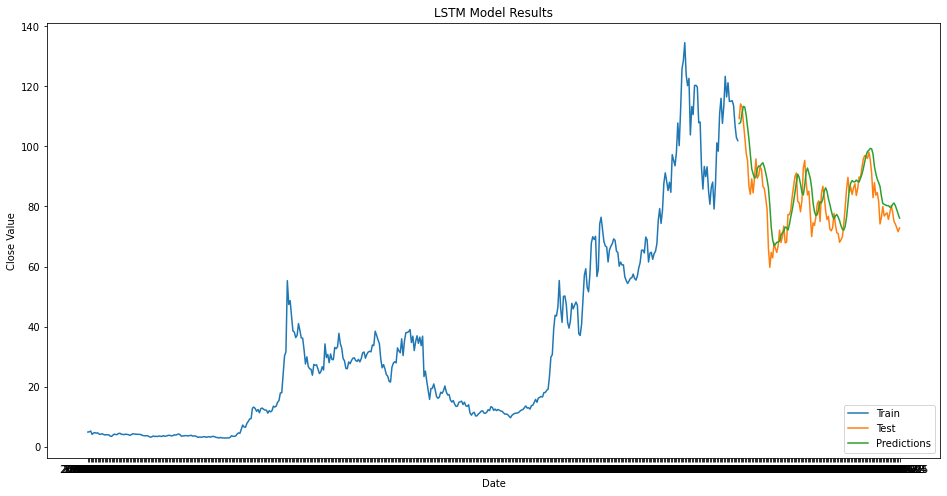

In [368]:
plot_results(dataset, train_data_len, predictions, 'AVAX')

In [349]:
def predict_values(new_data, currency, time_range, model):
    
    # Get the new data
    new_df = new_data.filter([currency + ' Close'])
    # Get the last x values
    
    last_days = new_df[-time_range:].values

        # Scale the date
    last_days_scaled = scaler.transform(last_days)

        # Create list
    x_test = []
    x_test.append(last_days_scaled)

        # Covert x_test to array and reshape
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

        # Get the predicted scaled close value
    predict_value = model.predict(x_test)
    predict_value = scaler.inverse_transform(predict_value)
        
    return predict_value

**Treat new data**

In [268]:
adj_close_new = pd.read_csv(r'C:\Users\Administrador\OneDrive - NOVAIMS\Mestrado\Business Cases DS\business-cases-21-22\BC4_crypto_forecasting\data_updated\adj_close.csv')
close_new = pd.read_csv(r'C:\Users\Administrador\OneDrive - NOVAIMS\Mestrado\Business Cases DS\business-cases-21-22\BC4_crypto_forecasting\data_updated\close.csv')
high_new = pd.read_csv(r'C:\Users\Administrador\OneDrive - NOVAIMS\Mestrado\Business Cases DS\business-cases-21-22\BC4_crypto_forecasting\data_updated\high.csv')
low_new = pd.read_csv(r'C:\Users\Administrador\OneDrive - NOVAIMS\Mestrado\Business Cases DS\business-cases-21-22\BC4_crypto_forecasting\data_updated\low.csv')
open_new = pd.read_csv(r'C:\Users\Administrador\OneDrive - NOVAIMS\Mestrado\Business Cases DS\business-cases-21-22\BC4_crypto_forecasting\data_updated\open.csv')
volume_new = pd.read_csv(r'C:\Users\Administrador\OneDrive - NOVAIMS\Mestrado\Business Cases DS\business-cases-21-22\BC4_crypto_forecasting\data_updated\volume.csv')

In [269]:
adj_close_new 

,Date,ADA-USD,ATOM-USD,AVAX-USD,AXS-USD,BTC-USD,ETH-USD,LINK-USD,LUNA1-USD,MATIC-USD,SOL-USD
0,2017-05-09,NaN,NaN,NaN,NaN,1755.359985,NaN,NaN,NaN,NaN,NaN
1,2017-05-10,NaN,NaN,NaN,NaN,1787.130005,NaN,NaN,NaN,NaN,NaN
2,2017-05-11,NaN,NaN,NaN,NaN,1848.569946,NaN,NaN,NaN,NaN,NaN
3,2017-05-12,NaN,NaN,NaN,NaN,1724.239990,NaN,NaN,NaN,NaN,NaN
4,2017-05-13,NaN,NaN,NaN,NaN,1804.910034,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1821,2022-05-04,0.896942,19.876862,67.086105,33.363853,39698.371094,2940.644775,12.145610,86.172264,1.171032,92.770851
1822,2022-05-05,0.791152,17.853285,59.127441,28.984409,36575.140625,2749.213135,10.917400,82.580406,1.064691,84.596024
1823,2022-05-06,0.783359,17.674110,57.034325,28.462557,36040.921875,2694.979736,10.799844,77.464806,1.044133,81.764107
1824,2022-05-07,0.761882,16.475998,55.156693,28.750196,35501.953125,2636.093018,10.239905,68.249123,1.021204,78.983421


In [270]:
adj_close_new.rename(columns = {'ADA-USD':'ADA AdjClose', 'ATOM-USD':'ATOM AdjClose', 'AVAX-USD':'AVAX AdjClose', 'AXS-USD':'AXS AdjClose',
                            'BTC-USD':'BTC AdjClose', 'ETH-USD':'ETH AdjClose', 'LINK-USD':'LINK AdjClose', 'LUNA1-USD':'LUNA1 AdjClose',
                            'MATIC-USD':'MATIC AdjClose', 'SOL-USD':'SOL AdjClose'}, inplace = True)

close_new.rename(columns = {'ADA-USD':'ADA Close', 'ATOM-USD':'ATOM Close', 'AVAX-USD':'AVAX Close', 'AXS-USD':'AXS Close',
                            'BTC-USD':'BTC Close', 'ETH-USD':'ETH Close', 'LINK-USD':'LINK Close', 'LUNA1-USD':'LUNA1 Close',
                            'MATIC-USD':'MATIC Close', 'SOL-USD':'SOL Close'}, inplace = True)

high_new.rename(columns = {'ADA-USD':'ADA High', 'ATOM-USD':'ATOM High', 'AVAX-USD':'AVAX High', 'AXS-USD':'AXS High',
                            'BTC-USD':'BTC High', 'ETH-USD':'ETH High', 'LINK-USD':'LINK High', 'LUNA1-USD':'LUNA1 High',
                            'MATIC-USD':'MATIC High', 'SOL-USD':'SOL High'}, inplace = True)

low_new.rename(columns = {'ADA-USD':'ADA Low', 'ATOM-USD':'ATOM Low', 'AVAX-USD':'AVAX Low', 'AXS-USD':'AXS Low',
                            'BTC-USD':'BTC Low', 'ETH-USD':'ETH Low', 'LINK-USD':'LINK Low', 'LUNA1-USD':'LUNA1 Low',
                            'MATIC-USD':'MATIC Low', 'SOL-USD':'SOL Low'}, inplace = True)

open_new.rename(columns = {'ADA-USD':'ADA Open', 'ATOM-USD':'ATOM Open', 'AVAX-USD':'AVAX Open', 'AXS-USD':'AXS Open',
                            'BTC-USD':'BTC Open', 'ETH-USD':'ETH Open', 'LINK-USD':'LINK Open', 'LUNA1-USD':'LUNA1 Open',
                            'MATIC-USD':'MATIC Open', 'SOL-USD':'SOL Open'}, inplace = True)

volume_new.rename(columns = {'ADA-USD':'ADA Volume', 'ATOM-USD':'ATOM Volume', 'AVAX-USD':'AVAX Volume', 'AXS-USD':'AXS Volume',
                            'BTC-USD':'BTC Volume', 'ETH-USD':'ETH Volume', 'LINK-USD':'LINK Volume', 'LUNA1-USD':'LUNA1 Volume',
                            'MATIC-USD':'MATIC Volume', 'SOL-USD':'SOL Volume'}, inplace = True)

In [271]:
adj_close_new 

,Date,ADA AdjClose,ATOM AdjClose,AVAX AdjClose,AXS AdjClose,BTC AdjClose,ETH AdjClose,LINK AdjClose,LUNA1 AdjClose,MATIC AdjClose,SOL AdjClose
0,2017-05-09,NaN,NaN,NaN,NaN,1755.359985,NaN,NaN,NaN,NaN,NaN
1,2017-05-10,NaN,NaN,NaN,NaN,1787.130005,NaN,NaN,NaN,NaN,NaN
2,2017-05-11,NaN,NaN,NaN,NaN,1848.569946,NaN,NaN,NaN,NaN,NaN
3,2017-05-12,NaN,NaN,NaN,NaN,1724.239990,NaN,NaN,NaN,NaN,NaN
4,2017-05-13,NaN,NaN,NaN,NaN,1804.910034,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1821,2022-05-04,0.896942,19.876862,67.086105,33.363853,39698.371094,2940.644775,12.145610,86.172264,1.171032,92.770851
1822,2022-05-05,0.791152,17.853285,59.127441,28.984409,36575.140625,2749.213135,10.917400,82.580406,1.064691,84.596024
1823,2022-05-06,0.783359,17.674110,57.034325,28.462557,36040.921875,2694.979736,10.799844,77.464806,1.044133,81.764107
1824,2022-05-07,0.761882,16.475998,55.156693,28.750196,35501.953125,2636.093018,10.239905,68.249123,1.021204,78.983421


In [272]:
close_new.drop('Date', axis = 1, inplace = True)
high_new.drop('Date', axis = 1, inplace = True)
low_new.drop('Date', axis = 1, inplace = True)
open_new.drop('Date', axis = 1, inplace = True)
volume_new.drop('Date', axis = 1, inplace = True)

dfs_new = [adj_close_new, close_new, high_new, low_new, open_new, volume_new]
dataset_new = pd.concat(dfs_new, axis = 1)

ADA_new = dataset_new[['Date', 'ADA AdjClose', 'ADA Close', 'ADA High', 'ADA Low', 'ADA Open', 'ADA Volume']]
ATOM_new = dataset_new[['Date', 'ATOM AdjClose', 'ATOM Close', 'ATOM High', 'ATOM Low', 'ATOM Open', 'ATOM Volume']]
AVAX_new = dataset_new[['Date', 'AVAX AdjClose', 'AVAX Close', 'AVAX High', 'AVAX Low', 'AVAX Open', 'AVAX Volume']]
AXS_new = dataset_new[['Date', 'AXS AdjClose', 'AXS Close', 'AXS High', 'AXS Low', 'AXS Open', 'AXS Volume']]
BTC_new = dataset_new[['Date', 'BTC AdjClose', 'BTC Close', 'BTC High', 'BTC Low', 'BTC Open', 'BTC Volume']]
ETH_new = dataset_new[['Date', 'ETH AdjClose', 'ETH Close', 'ETH High', 'ETH Low', 'ETH Open', 'ETH Volume']]
LINK_new = dataset_new[['Date', 'LINK AdjClose', 'LINK Close', 'LINK High', 'LINK Low', 'LINK Open', 'LINK Volume']]
LUNA1_new = dataset_new[['Date', 'LUNA1 AdjClose', 'LUNA1 Close', 'LUNA1 High', 'LUNA1 Low', 'LUNA1 Open', 'LUNA1 Volume']]
MATIC_new = dataset_new[['Date', 'MATIC AdjClose', 'MATIC Close', 'MATIC High', 'MATIC Low', 'MATIC Open', 'MATIC Volume']]
SOL_new = dataset_new[['Date', 'SOL AdjClose', 'SOL Close', 'SOL High', 'SOL Low', 'SOL Open', 'SOL Volume']]

ADA_new.dropna(inplace = True)
ATOM_new.dropna(inplace = True)
AVAX_new.dropna(inplace = True)
AXS_new.dropna(inplace = True)
BTC_new.dropna(inplace = True)
ETH_new.dropna(inplace = True)
LINK_new.dropna(inplace = True)
LUNA1_new.dropna(inplace = True)
MATIC_new.dropna(inplace = True)
SOL_new.dropna(inplace = True)

<ipython-input-272-5d498e9b9a3b>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ADA_new.dropna(inplace = True)
<ipython-input-272-5d498e9b9a3b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ATOM_new.dropna(inplace = True)
<ipython-input-272-5d498e9b9a3b>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AVAX_new.dropna(inplace = True)
<ipython-input-272-5d498e9b9a3b>:24: SettingWithCopyWarning: 
A value is trying to be set on a 

In [278]:
ADA_new1 = ADA_new.copy()

In [279]:
ADA_new1

,Date,ADA AdjClose,ADA Close,ADA High,ADA Low,ADA Open,ADA Volume
184,2017-11-09,0.032053,0.032053,0.035060,0.025006,0.025160,1.871620e+07
185,2017-11-10,0.027119,0.027119,0.033348,0.026451,0.032219,6.766780e+06
186,2017-11-11,0.027437,0.027437,0.029659,0.025684,0.026891,5.532220e+06
187,2017-11-12,0.023977,0.023977,0.027952,0.022591,0.027480,7.280250e+06
188,2017-11-13,0.025808,0.025808,0.026300,0.023495,0.024364,4.419440e+06
...,...,...,...,...,...,...,...
1821,2022-05-04,0.896942,0.896942,0.897661,0.769638,0.771107,1.516023e+09
1822,2022-05-05,0.791152,0.791152,0.904111,0.778141,0.897061,1.802129e+09
1823,2022-05-06,0.783359,0.783359,0.798315,0.765742,0.791065,1.312284e+09
1824,2022-05-07,0.761882,0.761882,0.785116,0.750657,0.783352,8.015589e+08


In [281]:
predict_value1 = predict_values(ADA_new1, 'ADA', 30, modelADA).tolist()[0][0]

In [282]:
predict_value1

0.6868367195129395

In [283]:
ADA_new1

,Date,ADA AdjClose,ADA Close,ADA High,ADA Low,ADA Open,ADA Volume
184,2017-11-09,0.032053,0.032053,0.035060,0.025006,0.025160,1.871620e+07
185,2017-11-10,0.027119,0.027119,0.033348,0.026451,0.032219,6.766780e+06
186,2017-11-11,0.027437,0.027437,0.029659,0.025684,0.026891,5.532220e+06
187,2017-11-12,0.023977,0.023977,0.027952,0.022591,0.027480,7.280250e+06
188,2017-11-13,0.025808,0.025808,0.026300,0.023495,0.024364,4.419440e+06
...,...,...,...,...,...,...,...
1821,2022-05-04,0.896942,0.896942,0.897661,0.769638,0.771107,1.516023e+09
1822,2022-05-05,0.791152,0.791152,0.904111,0.778141,0.897061,1.802129e+09
1823,2022-05-06,0.783359,0.783359,0.798315,0.765742,0.791065,1.312284e+09
1824,2022-05-07,0.761882,0.761882,0.785116,0.750657,0.783352,8.015589e+08


In [288]:
predicted = {'Date': '2022-05-09', 'ADA AdjClose': 0, 'ADA Close': predict_value1, 'ADA High': 0, 'ADA Low': 0, 
             'ADA Open': 0, 'ADA Volume': 0}

In [295]:
ADA_new2 = ADA_new1.append(predicted, ignore_index = True)

In [291]:
ADA_new2 = ADA_new1.copy()

In [296]:
ADA_new2

,Date,ADA AdjClose,ADA Close,ADA High,ADA Low,ADA Open,ADA Volume
0,2017-11-09,0.032053,0.032053,0.035060,0.025006,0.025160,1.871620e+07
1,2017-11-10,0.027119,0.027119,0.033348,0.026451,0.032219,6.766780e+06
2,2017-11-11,0.027437,0.027437,0.029659,0.025684,0.026891,5.532220e+06
3,2017-11-12,0.023977,0.023977,0.027952,0.022591,0.027480,7.280250e+06
4,2017-11-13,0.025808,0.025808,0.026300,0.023495,0.024364,4.419440e+06
...,...,...,...,...,...,...,...
1638,2022-05-05,0.791152,0.791152,0.904111,0.778141,0.897061,1.802129e+09
1639,2022-05-06,0.783359,0.783359,0.798315,0.765742,0.791065,1.312284e+09
1640,2022-05-07,0.761882,0.761882,0.785116,0.750657,0.783352,8.015589e+08
1641,2022-05-08,0.744362,0.744362,0.763704,0.731738,0.761689,1.092425e+09


In [297]:
predict_value2 = predict_values(ADA_new2, 'ADA', 30, modelADA).tolist()[0][0]

In [298]:
predict_value2

0.644574761390686

In [326]:
SOL_new1 = SOL_new.copy()

In [329]:
SOL_new1

,Date,SOL AdjClose,SOL Close,SOL High,SOL Low,SOL Open,SOL Volume
1067,2020-04-10,0.951054,0.951054,1.313487,0.694187,0.832005,8.736428e+07
1068,2020-04-11,0.776819,0.776819,1.049073,0.765020,0.951054,4.386244e+07
1069,2020-04-12,0.882507,0.882507,0.956670,0.762426,0.785448,3.873690e+07
1070,2020-04-13,0.777832,0.777832,0.891603,0.773976,0.890760,1.821128e+07
1071,2020-04-14,0.661925,0.661925,0.796472,0.628169,0.777832,1.674761e+07
...,...,...,...,...,...,...,...
1821,2022-05-04,92.770851,92.770851,92.937195,85.728065,85.841728,1.428455e+09
1822,2022-05-05,84.596024,84.596024,95.032822,81.834869,92.769791,1.805979e+09
1823,2022-05-06,81.764107,81.764107,84.646935,80.468613,84.588493,1.585082e+09
1824,2022-05-07,78.983421,78.983421,82.180786,77.883232,81.766670,1.139093e+09


In [327]:
predict_value1 = predict_values(SOL_new1, 'SOL', 30, modelSOL).tolist()[0][0]

In [328]:
predict_value1

82.23225402832031

In [330]:
predicted = {'Date': '2022-05-09', 'SOL AdjClose': 0, 'SOL Close': predict_value1, 'SOL High': 0, 'SOL Low': 0, 
             'SOL Open': 0, 'SOL Volume': 0}

In [331]:
SOL_new2 = SOL_new1.append(predicted, ignore_index = True)

In [332]:
SOL_new2

,Date,SOL AdjClose,SOL Close,SOL High,SOL Low,SOL Open,SOL Volume
0,2020-04-10,0.951054,0.951054,1.313487,0.694187,0.832005,8.736428e+07
1,2020-04-11,0.776819,0.776819,1.049073,0.765020,0.951054,4.386244e+07
2,2020-04-12,0.882507,0.882507,0.956670,0.762426,0.785448,3.873690e+07
3,2020-04-13,0.777832,0.777832,0.891603,0.773976,0.890760,1.821128e+07
4,2020-04-14,0.661925,0.661925,0.796472,0.628169,0.777832,1.674761e+07
...,...,...,...,...,...,...,...
755,2022-05-05,84.596024,84.596024,95.032822,81.834869,92.769791,1.805979e+09
756,2022-05-06,81.764107,81.764107,84.646935,80.468613,84.588493,1.585082e+09
757,2022-05-07,78.983421,78.983421,82.180786,77.883232,81.766670,1.139093e+09
758,2022-05-08,75.536499,75.536499,79.194817,74.570267,79.022034,1.447528e+09


In [333]:
predict_value2 = predict_values(SOL_new2, 'SOL', 30, modelSOL).tolist()[0][0]

In [334]:
predict_value2

81.62108612060547

In [350]:
ATOM_new1 = ATOM_new.copy()

In [351]:
ATOM_new1

,Date,ATOM AdjClose,ATOM Close,ATOM High,ATOM Low,ATOM Open,ATOM Volume
674,2019-03-14,6.526642,6.526642,6.639943,6.353963,6.439715,7318172.0
675,2019-03-15,7.504351,7.504351,7.715249,6.432468,6.633174,6057301.0
676,2019-03-16,7.383882,7.383882,8.305615,6.694531,7.507990,3477393.0
677,2019-03-17,4.776164,4.776164,7.357443,4.727895,7.357443,2653565.0
678,2019-03-18,5.110341,5.110341,5.229982,4.828242,4.828242,2567201.0
...,...,...,...,...,...,...,...
1821,2022-05-04,19.876862,19.876862,19.987272,17.563868,17.593870,549565214.0
1822,2022-05-05,17.853285,17.853285,20.270138,17.410774,19.871162,614325972.0
1823,2022-05-06,17.674110,17.674110,17.950396,17.255348,17.853285,447936108.0
1824,2022-05-07,16.475998,16.475998,17.680393,16.186054,17.676107,455478758.0


In [352]:
predict_value1 = predict_values(ATOM_new1, 'ATOM', 30, modelATOM).tolist()[0][0]

In [353]:
predict_value1

16.489604949951172

In [354]:
predicted = {'Date': '2022-05-09', 'ATOM AdjClose': 0, 'ATOM Close': predict_value1, 'ATOM High': 0, 'ATOM Low': 0, 
             'ATOM Open': 0, 'ATOM Volume': 0}

In [355]:
ATOM_new2 = ATOM_new1.append(predicted, ignore_index = True)

In [356]:
predict_value2 = predict_values(ATOM_new2, 'ATOM', 30, modelATOM).tolist()[0][0]

In [357]:
predict_value2

16.49298095703125

In [369]:
AVAX_new1 = AVAX_new.copy()

In [370]:
AVAX_new1

,Date,AVAX AdjClose,AVAX Close,AVAX High,AVAX Low,AVAX Open,AVAX Volume
1161,2020-07-13,4.896294,4.896294,4.915115,4.481499,4.613968,2.834000e+04
1162,2020-07-14,4.986754,4.986754,5.229564,4.762068,4.909865,3.957000e+03
1232,2020-09-22,5.234632,5.234632,11.463443,4.125380,4.986754,2.880988e+08
1233,2020-09-23,4.118469,4.118469,5.329310,3.982604,5.321654,1.730912e+08
1234,2020-09-24,4.566561,4.566561,4.751878,3.539887,3.817925,9.611096e+07
...,...,...,...,...,...,...,...
1821,2022-05-04,67.086105,67.086105,67.282066,59.498161,59.658340,8.757237e+08
1822,2022-05-05,59.127441,59.127441,69.349014,57.024452,67.076157,1.259826e+09
1823,2022-05-06,57.034325,57.034325,59.306812,55.412495,59.121109,8.872802e+08
1824,2022-05-07,55.156693,55.156693,57.439198,53.625706,57.035454,5.551183e+08


In [371]:
predict_value1 = predict_values(AVAX_new1, 'AVAX', 15, modelAVAX).tolist()[0][0]

In [372]:
predict_value1

58.48470687866211

In [373]:
predicted = {'Date': '2022-05-09', 'AVAX AdjClose': 0, 'AVAX Close': predict_value1, 'AVAX High': 0, 'AVAX Low': 0, 
             'AVAX Open': 0, 'AVAX Volume': 0}

In [374]:
AVAX_new2 = AVAX_new1.append(predicted, ignore_index = True)

In [375]:
predict_value2 = predict_values(AVAX_new2, 'AVAX', 15, modelAVAX).tolist()[0][0]
predict_value2

58.21998596191406

In [ ]:
AXS_new1 = AXS_new.copy()

In [ ]:
predict_value1 = predict_values(AXS_new1, 'AXS', 15, modelAVAX).tolist()[0][0]